The program implements logistic regression along with gradient decent algorithm on
synthetic data and the real-world data. We have calculated the error rate of test and training sets in
different circumstances like adding the nominal variable’s and concluded the performance of the
model. Finally, we have split the data into ten splits and train the model in a loop ten times to
evaluate the training testing error and the bias variance trade-off is discussed

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Q1  - Synthetic data

In [237]:
def model (x, par): 
    f_ =  par[0] + np.sum(x*(par[1:]))
    f = 1/(1 + np.exp(-f_))  
       
    return f

def dModel (x , par ) :
    df = np. zeros (len(par))
    f_ =   par[0] + np.sum(x*(par[1:]))
    df = (1/(1 + np.exp(-f_))) * (1-(1/(1 + np.exp(-f_))))
    
    return df
            

def objective (par,data ) :
    ell = 0
    for x,y in data:
        f = model(x,par)
     
        ell = ell - np.log((y * f) + ((1-y)*(1-f)))
    
    return ell

def gradient( par , data ) :
    grad = np.zeros(len(par))
    for x,y in data:
        f = model(x,par)
        df = dModel(x,par)
        g = -1*(((2*y)-1) / ((y*f) + (1-y) * (1 - f)) ) * df
        grad = grad + g
    
    return grad

def train ( par0 , eta , T , data ) :
    par = list(par0)
    obj = []
    for i in range(1,T):
        ell = objective(par,data) 
        grad = gradient(par,data)
        obj.append(ell)
        par = par - (eta * grad) 
    return par , obj

def ER (par,data) :
    ER = 0
    for x,y in data:
        f = model(x,par)
        if f > 0.5:
            y_ = 1
        else:
            f_ = 0
            
        ER = (ER + (y - f)**2)/len(x)
    return ER


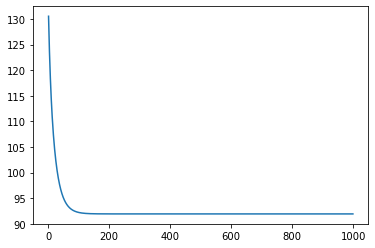

In [148]:
def generateData (d , N, noise =.01) :
    X = [ np.random.randn(d) for n in range (N) ]
    lambdaTrue = np.cos(np.random.randn(d +1))
    Y = [(( lambdaTrue [0] + lambdaTrue [1:] @ s ) + noise *
          np . random . randn () > 0) for s in X ]
    D = [[X[n] ,Y[n]] for n in range ( N ) ]
    
    return D

eta = 0.01 # set the learning rate
T = 1000 # set the number of epochs
N = 100 # number of data points to be generated
d = 10 # dimension of each data point
data = generateData(d, N) # generate a synthetic training data set
# par0 = np.random.randn(d+1) # generate a random initialisation
par0 = [(-1)**i for i in range(d+1)]
par , obj = train(par0,eta,T,data) # train the model
plt.plot(range(1,T),obj) # plot the objective
plt.show()


# Q2  - Real-world data

In [420]:
file = "auto.txt"
data = pd.read_csv(file, sep = '\t',header =0)
Dn = [[ np.asarray([ x[4] , x[5] , x[6]]) , 1 * ( x[0] >= 23) ] for x in data.values ] #Creating list of lists
me = np.mean(Dn) #calculating the mean of the data
st = np.std(Dn) #calculating standard deviation
D_norm =[]

#logic to normalize the data (Same throughout the code)
for i in range(len(Dn)):
    D_norm.append([(Dn[i][0] - np.mean(Dn))/np.std(Dn),Dn[i][1]])

#splitting the data in training and testing set (Same throughout the code)
reshuffle = np.random.choice(len(D_norm), len(D_norm), replace=False)
size = int(len(D_norm)/2)
d_train = [D_norm[i] for i in reshuffle[:size]]
d_test = [D_norm[i] for i in reshuffle[size:]]

D:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
D:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:197: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


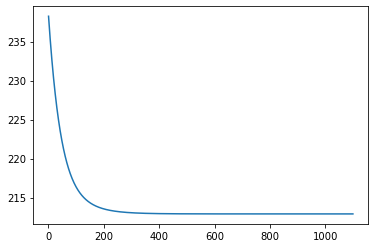

In [317]:
eta = 0.0001# set the learning rate
T = 1100# set the number of epochs'
d=10 # no, of dimensions.
par0 = np.random.normal(0,0.7,len(d_train[0][0]) + 1) # generate a random initialisation
par , obj = train(par0,eta,T,d_train) # train the model
plt.plot(range(1,T),obj) # plot the objective
plt.show()

In [318]:
er = ER(par,d_test) # error rates for test

In [319]:
print("Error Rate of real-world data on set : ",er)

Error Rate of real-world data set :  0.15041907531921594


In [365]:
er = ER(par,d_train)
print("Error Rate of real-world data on set : ",er)

Error Rate of real-world data on set :  0.1550767441065188


# Q3  - Nominal variables

In [389]:
file = "auto.txt"
data1 = pd.read_csv(file, sep = '\t',header =0)
c = pd.get_dummies(data1, columns=['origin'], drop_first=False) # creating a set of dummy variables for origin
Dm = [[ np.asarray([ x[4],x[5],x[6],x[8],x[9],x[10]],) , 1 * ( x[0] >= 23) ] for x in c.values]
D_norm_ =[]
for i in range(len(Dm)): 
    D_norm_.append([(Dm[i][0] - np.mean(Dm))/np.std(Dm),Dm[i][1]])

reshuffle = np.random.choice(len(D_norm_), len(D_norm_), replace=False)
size = int(len(D_norm_)/2)
d_train = [D_norm_[i] for i in reshuffle[:size]]
d_test = [D_norm_[i] for i in reshuffle[size:]]


D:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
D:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:197: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


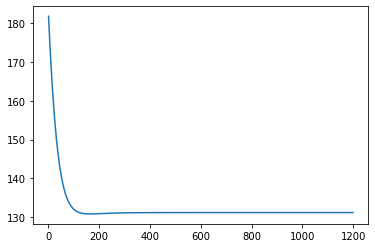

In [347]:
eta = 0.0001 # set the learning rate
T = 1200 # set the number of epochs'
d=10  
par0 = np.random.normal(0,0.7,len(d_train[0][0]) + 1) # generate a random initialisation
par , obj = train(par0,eta,T,d_train) #            train the model
plt.plot(range(1,T),obj) # plot the objective
plt.show()

In [359]:
er = ER(par,d_test) # error rates for test.

In [361]:
print("Error Rate of augumented set on d_test : ",er)

Error Rate of augumented set on d_test :  0.03217157053162776


In [370]:
er = ER(par,d_train)
print("Error Rate of real-world data on set : ",er)

Error Rate of real-world data on set :  0.025612758722931502


# Q4 - Training and testing error

In [462]:
file = "auto.txt"
data = pd.read_csv(file, sep = '\t',header =0)
Dn = [[ np.asarray([ x[4] , x[5] , x[6]]) , 1 * ( x[0] >= 23) ] for x in data.values ]
for i in range(len(Dn)):
    D_norm.append([(Dn[i][0] - np.mean(Dn))/np.std(Dn),Dn[i][1]])
splits = 10
size=round(len(Dn)/10)


eta = 0.001# set the learning rate
T = 1100# set the number of epochs'
d=10
ER_train = [] #list to store training set error rate
ER_test =[]#list to store test set error rate

#logic to generate random splits for  i = 1...10 and training the data
par0 = np.random.normal(0,0.7,len(d_train[0][0]) + 1)
for i in range(splits):
    reshuffle = np.random.choice(len(D_norm), len(D_norm), replace=False)
    d_train = [D_norm[i] for i in reshuffle[:(size//2)]]
    d_test = [D_norm[i] for i in reshuffle[(size//2):]]
    par , obj = train(par0,eta,T,d_train)
    ER_train.append(ER(par,d_train))
    ER_test.append(ER(par,d_test))

D:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
D:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:197: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


In [482]:
print("Error Rates on training sets : ",ER_train)  


Error Rates on training sets :  [0.11658469590290617, 0.12181598378225833, 0.10716376260697813, 0.15262802972432668, 0.10282772862601013, 0.11848618639052523, 0.14727853681138361, 0.03909773357084509, 0.09617921247079857, 0.07067431220025662]


In [483]:
print("Error Rates on test sets : ",ER_test)

Error Rates on test sets :  [0.10773137180148636, 0.13044939833497757, 0.1173343923829659, 0.13655242740143106, 0.132473901184474, 0.10519184148139686, 0.06727214485455611, 0.09032613526679072, 0.09937796534379732, 0.13399506122599028]
